# install pre requisits


In [1]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!pip install jupyter
!pip install matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-tk is already the newest version (2.7.14-1).
The following additional packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  liblcms2-utils python-genshi python-lxml-dbg python-lxml-doc python-pil-doc
  python-pil-dbg python-setuptools
The following NEW packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 protobuf-compiler python-bs4 python-chardet python-html5lib
  python-lxml python-olefile python-pil python-pkg-resources python-six
  python-webencodings
0 upgraded, 18 newly installed, 0 to remove and 0 not upgraded.
Need to get 3,751 kB of archives.
After this operation, 14.6 MB of additional disk space will be used.
Get:1 

Setting up libjbig0:amd64 (2.1-3.1) ...
Setting up libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Setting up python-pkg-resources (36.2.7-2) ...
Setting up libxslt1.1:amd64 (1.1.29-2.1ubuntu1) ...
Setting up libprotobuf10:amd64 (3.0.0-9ubuntu5) ...
Setting up python-six (1.10.0-4) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up python-bs4 (4.6.0-1) ...
Setting up python-lxml (4.0.0-1) ...
Setting up python-olefile (0.44-1) ...
Setting up libprotoc10:amd64 (3.0.0-9ubuntu5) ...
Setting up python-webencodings (0.5-2) ...
Setting up libwebp6:amd64 (0.6.0-3) ...
Setting up python-chardet (3.0.4-1) ...
Setting up protobuf-compiler (3.0.0-9ubuntu5) ...
Setting up libwebpmux3:amd64 (0.6.0-3) ...
Setting up python-html5lib (0.999999999-1) ...
Setting up python-pil:amd64 (4.1.1-3build2) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
    100% |████████████████████████████████| 3.3MB 7.0MB/s 
    100% |████████████████████████████████| 112kB 4.4MB/s 
    100% |████████████

In [2]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Counting objects: 16309, done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 16309 (delta 26), reused 26 (delta 10), pack-reused 16246
Receiving objects: 100% (16309/16309), 424.14 MiB | 36.29 MiB/s, done.
Resolving deltas: 100% (9632/9632), done.


In [3]:
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/

Cloning into 'cocoapi'...
remote: Counting objects: 936, done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 936 (delta 0), reused 4 (delta 0), pack-reused 931
Receiving objects: 100% (936/936), 11.69 MiB | 26.47 MiB/s, done.
Resolving deltas: 100% (557/557), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-2.7
creating build/temp.linux-x86_64-2.7/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -fno-strict-aliasing -Wdate-time -D_FORTIFY_SOURCE=2 -g -fdebug-prefix-map=/build/python2.7-l1RrwO/python2.7-2.7.14=. -fstack-protector-strong -Wformat -Werror=format-security -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I../common -I/usr/include/python2.7 -c ../common/maskApi.c -o build/temp.linux-x86_64-2.7/../common/maskApi.o -Wno-cpp -Wno-u

In [1]:
cd /content/models/research

/content/models/research


In [2]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

Test the API

In [7]:
!python object_detection/builders/model_builder_test.py

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
...............
----------------------------------------------------------------------
Ran 15 tests in 0.075s

OK


# get the oxford pets dataset

**This takes a while......**

In [7]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xvf images.tar.gz
!tar -xvf annotations.tar.gz

--2018-05-10 03:08:49--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz        47%[========>           ] 355.50M  8.92MB/s    eta 52s    

images.tar.gz       100%[===================>] 755.23M  9.10MB/s    in 89s     

2018-05-10 03:10:19 (8.48 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2018-05-10 03:10:20--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  7.20MB/s    in 2.5s    

2018-05-10 03:10:22 (7.20 MB/s) - ‘annotations.tar.gz’ saved [19173078/19173078]

images/
images/boxer_16.jpg
images/chihuahua_165.jpg
images/pug_183.jpg
images/english_setter_1.jpg
images/chihuahua_170.jpg
images/english_cocker_spaniel_17.jpg
images/samoyed_39.jpg
images/Egyptian_Mau_62.jpg
images/samoyed_36.jpg
images/german_shorthaired_3.jpg
images/Ragdoll_183.jpg
images/British_Shorth

images/scottish_terrier_199.jpg
images/chihuahua_146.jpg
images/Birman_60.jpg
images/Egyptian_Mau_185.jpg
images/english_setter_33.jpg
images/german_shorthaired_47.jpg
images/leonberger_158.jpg
images/american_bulldog_216.jpg
images/Abyssinian_117.jpg
images/scottish_terrier_90.jpg
images/japanese_chin_81.jpg
images/boxer_23.jpg
images/shiba_inu_65.jpg
images/shiba_inu_84.jpg
images/beagle_61.jpg
images/scottish_terrier_36.jpg
images/english_setter_65.jpg
images/boxer_43.jpg
images/British_Shorthair_207.jpg
images/miniature_pinscher_200.jpg
images/scottish_terrier_89.jpg
images/german_shorthaired_49.jpg
images/pomeranian_65.jpg
images/chihuahua_25.jpg
images/newfoundland_104.jpg
images/newfoundland_92.jpg
images/chihuahua_125.jpg
images/Egyptian_Mau_101.jpg
images/leonberger_145.jpg
images/pomeranian_195.jpg
images/pug_181.jpg
images/Siamese_46.jpg
images/beagle_13.jpg
images/havanese_165.jpg
images/keeshond_119.jpg
images/Maine_Coon_24.jpg
images/British_Shorthair_65.jpg
images/Persia

images/wheaten_terrier_76.jpg
images/beagle_50.jpg
images/english_cocker_spaniel_94.jpg
images/pomeranian_56.jpg
images/Persian_25.jpg
images/pomeranian_85.jpg
images/Siamese_64.jpg
images/Russian_Blue_45.jpg
images/Ragdoll_252.jpg
images/Egyptian_Mau_148.jpg
images/Abyssinian_77.jpg
images/english_cocker_spaniel_163.jpg
images/chihuahua_43.jpg
images/Abyssinian_15.jpg
images/chihuahua_138.jpg
images/keeshond_52.jpg
images/pug_132.jpg
images/great_pyrenees_29.jpg
images/havanese_62.jpg
images/havanese_40.jpg
images/english_cocker_spaniel_84.jpg
images/wheaten_terrier_47.jpg
images/yorkshire_terrier_154.jpg
images/Bombay_75.jpg
images/shiba_inu_102.jpg
images/newfoundland_114.jpg
images/great_pyrenees_153.jpg
images/Egyptian_Mau_35.jpg
images/great_pyrenees_183.jpg
images/Abyssinian_137.jpg
images/english_setter_79.jpg
images/saint_bernard_181.jpg
images/basset_hound_102.jpg
images/english_setter_3.jpg
images/newfoundland_79.jpg
images/pug_34.jpg
images/Abyssinian_69.jpg
images/japanese

images/pug_178.jpg
images/pomeranian_134.jpg
images/saint_bernard_192.jpg
images/Russian_Blue_130.jpg
images/Bengal_168.jpg
images/shiba_inu_113.jpg
images/Egyptian_Mau_115.jpg
images/havanese_85.jpg
images/newfoundland_147.jpg
images/Ragdoll_158.jpg
images/basset_hound_69.jpg
images/Bengal_128.jpg
images/Sphynx_104.jpg
images/Abyssinian_100.jpg
images/Abyssinian_221.jpg
images/Persian_260.jpg
images/samoyed_159.jpg
images/yorkshire_terrier_31.jpg
images/British_Shorthair_114.jpg
images/american_bulldog_147.jpg
images/Bengal_43.jpg
images/Egyptian_Mau_112.jpg
images/great_pyrenees_63.jpg
images/staffordshire_bull_terrier_127.jpg
images/keeshond_54.jpg
images/wheaten_terrier_122.jpg
images/miniature_pinscher_96.jpg
images/english_setter_135.jpg
images/Bombay_174.jpg
images/British_Shorthair_107.jpg
images/Birman_79.jpg
images/american_bulldog_108.jpg
images/pug_69.jpg
images/saint_bernard_26.jpg
images/saint_bernard_134.jpg
images/boxer_44.jpg
images/Siamese_216.jpg
images/great_pyrenee

images/yorkshire_terrier_84.jpg
images/scottish_terrier_85.jpg
images/american_bulldog_172.jpg
images/Sphynx_89.jpg
images/yorkshire_terrier_115.jpg
images/boxer_120.jpg
images/miniature_pinscher_86.jpg
images/yorkshire_terrier_64.jpg
images/Bombay_48.jpg
images/Maine_Coon_244.jpg
images/pomeranian_99.jpg
images/Abyssinian_68.jpg
images/Ragdoll_44.jpg
images/Ragdoll_118.jpg
images/Bombay_69.jpg
images/german_shorthaired_25.jpg
images/Birman_92.jpg
images/samoyed_68.jpg
images/newfoundland_48.jpg
images/wheaten_terrier_105.jpg
images/keeshond_20.jpg
images/english_setter_24.jpg
images/Persian_74.jpg
images/scottish_terrier_194.jpg
images/japanese_chin_171.jpg
images/Ragdoll_18.jpg
images/Abyssinian_76.jpg
images/american_bulldog_177.jpg
images/Egyptian_Mau_78.jpg
images/american_pit_bull_terrier_118.jpg
images/keeshond_131.jpg
images/saint_bernard_89.jpg
images/japanese_chin_150.jpg
images/samoyed_20.jpg
images/english_cocker_spaniel_77.jpg
images/staffordshire_bull_terrier_24.jpg
image

images/Bengal_192.jpg
images/Sphynx_121.jpg
images/american_pit_bull_terrier_63.jpg
images/scottish_terrier_48.jpg
images/Maine_Coon_91.jpg
images/Sphynx_108.jpg
images/yorkshire_terrier_63.jpg
images/wheaten_terrier_32.jpg
images/Sphynx_58.jpg
images/staffordshire_bull_terrier_60.jpg
images/german_shorthaired_109.jpg
images/scottish_terrier_103.jpg
images/japanese_chin_55.jpg
images/american_bulldog_126.jpg
images/Persian_26.jpg
images/boxer_196.jpg
images/staffordshire_bull_terrier_78.jpg
images/leonberger_154.jpg
images/pomeranian_90.jpg
images/english_cocker_spaniel_144.jpg
images/miniature_pinscher_70.jpg
images/Bombay_183.jpg
images/Ragdoll_34.jpg
images/american_bulldog_142.jpg
images/japanese_chin_20.jpg
images/great_pyrenees_154.jpg
images/beagle_85.jpg
images/boxer_132.jpg
images/British_Shorthair_270.jpg
images/scottish_terrier_15.jpg
images/pomeranian_14.jpg
images/Sphynx_59.jpg
images/staffordshire_bull_terrier_23.jpg
images/wheaten_terrier_58.jpg
images/basset_hound_89.jp

images/samoyed_32.jpg
images/staffordshire_bull_terrier_110.jpg
images/Egyptian_Mau_75.jpg
images/american_pit_bull_terrier_100.jpg
images/pomeranian_148.jpg
images/havanese_88.jpg
images/english_setter_152.jpg
images/Russian_Blue_183.jpg
images/Maine_Coon_54.jpg
images/newfoundland_76.jpg
images/Abyssinian_3.jpg
images/great_pyrenees_74.jpg
images/japanese_chin_76.jpg
images/beagle_112.jpg
images/great_pyrenees_4.jpg
images/english_cocker_spaniel_103.jpg
images/Abyssinian_157.jpg
images/Persian_65.jpg
images/english_setter_162.jpg
images/Maine_Coon_170.jpg
images/samoyed_198.jpg
images/Egyptian_Mau_98.jpg
images/samoyed_94.jpg
images/British_Shorthair_113.jpg
images/Russian_Blue_69.jpg
images/american_bulldog_53.jpg
images/american_bulldog_94.jpg
images/havanese_153.jpg
images/Persian_17.jpg
images/Siamese_86.jpg
images/Sphynx_139.jpg
images/British_Shorthair_177.jpg
images/Russian_Blue_142.jpg
images/Birman_112.jpg
images/yorkshire_terrier_30.jpg
images/basset_hound_152.jpg
images/en

images/chihuahua_168.jpg
images/american_bulldog_107.jpg
images/saint_bernard_176.jpg
images/Abyssinian_223.jpg
images/wheaten_terrier_2.jpg
images/german_shorthaired_183.jpg
images/pomeranian_105.jpg
images/Abyssinian_197.jpg
images/english_setter_109.jpg
images/japanese_chin_68.jpg
images/havanese_135.jpg
images/scottish_terrier_165.jpg
images/shiba_inu_44.jpg
images/leonberger_61.jpg
images/Sphynx_243.jpg
images/shiba_inu_191.jpg
images/yorkshire_terrier_200.jpg
images/havanese_82.jpg
images/Egyptian_Mau_49.jpg
images/Sphynx_166.jpg
images/japanese_chin_165.jpg
images/chihuahua_98.jpg
images/chihuahua_96.jpg
images/Bengal_196.jpg
images/miniature_pinscher_38.jpg
images/Bengal_52.jpg
images/staffordshire_bull_terrier_139.jpg
images/British_Shorthair_175.jpg
images/Birman_119.jpg
images/staffordshire_bull_terrier_119.jpg
images/yorkshire_terrier_185.jpg
images/english_setter_57.jpg
images/leonberger_56.jpg
images/yorkshire_terrier_114.jpg
images/Sphynx_181.jpg
images/great_pyrenees_61

images/chihuahua_192.jpg
images/chihuahua_72.jpg
images/Bengal_12.jpg
images/Siamese_9.jpg
images/keeshond_42.jpg
images/staffordshire_bull_terrier_13.jpg
images/basset_hound_151.jpg
images/Egyptian_Mau_30.jpg
images/Maine_Coon_138.jpg
images/Sphynx_28.jpg
images/Bengal_36.jpg
images/german_shorthaired_108.jpg
images/samoyed_34.jpg
images/pug_48.jpg
images/pug_112.jpg
images/saint_bernard_200.jpg
images/pomeranian_101.jpg
images/Siamese_170.jpg
images/Siamese_112.jpg
images/Birman_158.jpg
images/Egyptian_Mau_221.jpg
images/great_pyrenees_16.jpg
images/leonberger_9.jpg
images/great_pyrenees_199.jpg
images/Bengal_147.jpg
images/saint_bernard_104.jpg
images/Maine_Coon_134.jpg
images/american_bulldog_75.jpg
images/staffordshire_bull_terrier_150.jpg
images/Birman_159.jpg
images/Egyptian_Mau_26.jpg
images/pug_86.jpg
images/havanese_177.jpg
images/english_setter_153.jpg
images/english_cocker_spaniel_53.jpg
images/scottish_terrier_150.jpg
images/miniature_pinscher_191.jpg
images/Abyssinian_150

images/Persian_173.jpg
images/saint_bernard_58.jpg
images/chihuahua_51.jpg
images/leonberger_92.jpg
images/staffordshire_bull_terrier_29.jpg
images/British_Shorthair_267.jpg
images/samoyed_118.jpg
images/Maine_Coon_28.jpg
images/yorkshire_terrier_13.jpg
images/saint_bernard_150.jpg
images/leonberger_45.jpg
images/Persian_62.jpg
images/pug_62.jpg
images/chihuahua_80.jpg
images/leonberger_169.jpg
images/wheaten_terrier_71.jpg
images/wheaten_terrier_33.jpg
images/Abyssinian_32.jpg
images/chihuahua_35.jpg
images/miniature_pinscher_79.jpg
images/pomeranian_199.jpg
images/samoyed_139.jpg
images/saint_bernard_48.jpg
images/chihuahua_56.jpg
images/Bombay_100.jpg
images/British_Shorthair_268.jpg
images/saint_bernard_125.jpg
images/Bombay_61.jpg
images/Bombay_136.jpg
images/Ragdoll_196.jpg
images/saint_bernard_17.jpg
images/leonberger_75.jpg
images/Maine_Coon_41.jpg
images/Siamese_164.jpg
images/miniature_pinscher_74.jpg
images/British_Shorthair_274.jpg
images/scottish_terrier_30.jpg
images/samo

images/Russian_Blue_262.jpg
images/newfoundland_174.jpg
images/beagle_18.jpg
images/Sphynx_72.jpg
images/Bengal_97.jpg
images/Abyssinian_56.jpg
images/boxer_27.jpg
images/leonberger_137.jpg
images/basset_hound_41.jpg
images/Birman_131.jpg
images/keeshond_61.jpg
images/Birman_185.jpg
images/basset_hound_168.jpg
images/Russian_Blue_49.jpg
images/Sphynx_245.jpg
images/wheaten_terrier_113.jpg
images/shiba_inu_66.jpg
images/great_pyrenees_164.jpg
images/chihuahua_105.jpg
images/Maine_Coon_109.jpg
images/Persian_273.jpg
images/British_Shorthair_37.jpg
images/Bombay_59.jpg
images/basset_hound_22.jpg
images/British_Shorthair_159.jpg
images/Ragdoll_182.jpg
images/havanese_111.jpg
images/staffordshire_bull_terrier_51.jpg
images/Russian_Blue_34.jpg
images/staffordshire_bull_terrier_95.jpg
images/staffordshire_bull_terrier_165.jpg
images/american_bulldog_127.jpg
images/saint_bernard_144.jpg
images/great_pyrenees_38.jpg
images/pug_102.jpg
images/leonberger_97.jpg
images/yorkshire_terrier_26.jpg
ima

images/german_shorthaired_130.jpg
images/american_pit_bull_terrier_155.jpg
images/keeshond_189.jpg
images/american_pit_bull_terrier_175.jpg
images/japanese_chin_197.jpg
images/basset_hound_56.jpg
images/american_bulldog_63.jpg
images/Sphynx_129.jpg
images/pug_33.jpg
images/shiba_inu_42.jpg
images/yorkshire_terrier_56.jpg
images/Sphynx_37.jpg
images/keeshond_192.jpg
images/Bengal_58.jpg
images/chihuahua_117.jpg
images/samoyed_189.jpg
images/boxer_30.jpg
images/german_shorthaired_112.jpg
images/shiba_inu_94.jpg
images/boxer_76.jpg
images/american_pit_bull_terrier_176.jpg
images/Ragdoll_127.jpg
images/american_pit_bull_terrier_184.jpg
images/Persian_221.jpg
images/Siamese_91.jpg
images/english_cocker_spaniel_24.jpg
images/Sphynx_184.jpg
images/newfoundland_196.jpg
images/saint_bernard_155.jpg
images/Persian_272.jpg
images/japanese_chin_59.jpg
images/Russian_Blue_198.jpg
images/Bombay_111.jpg
images/Maine_Coon_246.jpg
images/scottish_terrier_12.jpg
images/keeshond_82.jpg
images/Persian_34.

images/Bombay_7.jpg
images/german_shorthaired_21.jpg
images/yorkshire_terrier_149.jpg
images/keeshond_170.jpg
images/great_pyrenees_11.jpg
images/Bengal_13.jpg
images/Sphynx_212.jpg
images/Russian_Blue_73.jpg
images/yorkshire_terrier_168.jpg
images/Persian_126.jpg
images/Russian_Blue_48.jpg
images/japanese_chin_187.jpg
images/pomeranian_109.jpg
images/pug_153.jpg
images/saint_bernard_14.jpg
images/Egyptian_Mau_23.jpg
images/Bengal_88.jpg
images/pomeranian_63.jpg
images/scottish_terrier_16.jpg
images/Bengal_82.jpg
images/japanese_chin_84.jpg
images/beagle_115.jpg
images/Persian_162.jpg
images/Bombay_117.jpg
images/keeshond_149.jpg
images/Persian_83.jpg
images/boxer_41.jpg
images/newfoundland_37.jpg
images/wheaten_terrier_24.jpg
images/japanese_chin_134.jpg
images/beagle_15.jpg
images/japanese_chin_2.jpg
images/boxer_49.jpg
images/german_shorthaired_91.jpg
images/japanese_chin_127.jpg
images/yorkshire_terrier_129.jpg
images/saint_bernard_63.jpg
images/British_Shorthair_71.jpg
images/leon

images/american_bulldog_109.jpg
images/staffordshire_bull_terrier_97.jpg
images/Birman_83.jpg
images/shiba_inu_91.jpg
images/miniature_pinscher_98.jpg
images/Siamese_88.jpg
images/english_cocker_spaniel_166.jpg
images/Ragdoll_186.jpg
images/Russian_Blue_222.jpg
images/yorkshire_terrier_18.jpg
images/pug_67.jpg
images/havanese_191.jpg
images/Egyptian_Mau_222.jpg
images/shiba_inu_40.jpg
images/Maine_Coon_9.jpg
images/saint_bernard_62.jpg
images/havanese_4.jpg
images/miniature_pinscher_113.jpg
images/Ragdoll_176.jpg
images/Siamese_100.jpg
images/staffordshire_bull_terrier_166.jpg
images/chihuahua_82.jpg
images/pomeranian_82.jpg
images/Bombay_181.jpg
images/american_pit_bull_terrier_8.jpg
images/keeshond_175.jpg
images/leonberger_81.jpg
images/great_pyrenees_87.jpg
images/pomeranian_59.jpg
images/Siamese_153.jpg
images/Siamese_125.jpg
images/american_pit_bull_terrier_67.jpg
images/american_bulldog_190.jpg
images/staffordshire_bull_terrier_42.jpg
images/english_cocker_spaniel_19.jpg
images/

annotations/xmls/beagle_139.xml
annotations/xmls/beagle_14.xml
annotations/xmls/beagle_140.xml
annotations/xmls/beagle_141.xml
annotations/xmls/beagle_142.xml
annotations/xmls/beagle_143.xml
annotations/xmls/beagle_144.xml
annotations/xmls/beagle_145.xml
annotations/xmls/beagle_146.xml
annotations/xmls/beagle_147.xml
annotations/xmls/beagle_148.xml
annotations/xmls/beagle_149.xml
annotations/xmls/beagle_15.xml
annotations/xmls/beagle_150.xml
annotations/xmls/beagle_151.xml
annotations/xmls/beagle_152.xml
annotations/xmls/beagle_153.xml
annotations/xmls/beagle_154.xml
annotations/xmls/beagle_155.xml
annotations/xmls/beagle_156.xml
annotations/xmls/beagle_157.xml
annotations/xmls/beagle_158.xml
annotations/xmls/beagle_16.xml
annotations/xmls/beagle_160.xml
annotations/xmls/beagle_161.xml
annotations/xmls/beagle_162.xml
annotations/xmls/beagle_163.xml
annotations/xmls/beagle_164.xml
annotations/xmls/beagle_165.xml
annotations/xmls/beagle_166.xml
annotations/xmls/beagle_167.xml
annotations

annotations/xmls/keeshond_181.xml
annotations/xmls/keeshond_182.xml
annotations/xmls/keeshond_183.xml
annotations/xmls/keeshond_184.xml
annotations/xmls/keeshond_185.xml
annotations/xmls/keeshond_186.xml
annotations/xmls/keeshond_187.xml
annotations/xmls/keeshond_188.xml
annotations/xmls/keeshond_189.xml
annotations/xmls/keeshond_190.xml
annotations/xmls/leonberger_10.xml
annotations/xmls/leonberger_100.xml
annotations/xmls/leonberger_101.xml
annotations/xmls/leonberger_102.xml
annotations/xmls/leonberger_103.xml
annotations/xmls/leonberger_104.xml
annotations/xmls/leonberger_105.xml
annotations/xmls/leonberger_106.xml
annotations/xmls/leonberger_107.xml
annotations/xmls/leonberger_108.xml
annotations/xmls/leonberger_109.xml
annotations/xmls/leonberger_11.xml
annotations/xmls/leonberger_110.xml
annotations/xmls/leonberger_111.xml
annotations/xmls/leonberger_112.xml
annotations/xmls/leonberger_113.xml
annotations/xmls/leonberger_114.xml
annotations/xmls/leonberger_115.xml
annotations/xm

annotations/xmls/Siamese_17.xml
annotations/xmls/Siamese_170.xml
annotations/xmls/Siamese_171.xml
annotations/xmls/Siamese_172.xml
annotations/xmls/Siamese_173.xml
annotations/xmls/Siamese_174.xml
annotations/xmls/Siamese_175.xml
annotations/xmls/Siamese_176.xml
annotations/xmls/Siamese_178.xml
annotations/xmls/Siamese_179.xml
annotations/xmls/Siamese_18.xml
annotations/xmls/Siamese_180.xml
annotations/xmls/Siamese_181.xml
annotations/xmls/Siamese_182.xml
annotations/xmls/Siamese_183.xml
annotations/xmls/Siamese_184.xml
annotations/xmls/Siamese_185.xml
annotations/xmls/Siamese_186.xml
annotations/xmls/Siamese_187.xml
annotations/xmls/Siamese_188.xml
annotations/xmls/Siamese_189.xml
annotations/xmls/Siamese_19.xml
annotations/xmls/Siamese_191.xml
annotations/xmls/Siamese_193.xml
annotations/xmls/Siamese_194.xml
annotations/xmls/Siamese_195.xml
annotations/xmls/Siamese_196.xml
annotations/xmls/Siamese_198.xml
annotations/xmls/Siamese_199.xml
annotations/xmls/Siamese_200.xml
annotations/x

annotations/trimaps/american_bulldog_80.png
annotations/trimaps/._american_bulldog_81.png
annotations/trimaps/american_bulldog_81.png
annotations/trimaps/._american_bulldog_82.png
annotations/trimaps/american_bulldog_82.png
annotations/trimaps/._american_bulldog_83.png
annotations/trimaps/american_bulldog_83.png
annotations/trimaps/._american_bulldog_84.png
annotations/trimaps/american_bulldog_84.png
annotations/trimaps/._american_bulldog_85.png
annotations/trimaps/american_bulldog_85.png
annotations/trimaps/._american_bulldog_86.png
annotations/trimaps/american_bulldog_86.png
annotations/trimaps/._american_bulldog_87.png
annotations/trimaps/american_bulldog_87.png
annotations/trimaps/._american_bulldog_89.png
annotations/trimaps/american_bulldog_89.png
annotations/trimaps/._american_bulldog_9.png
annotations/trimaps/american_bulldog_9.png
annotations/trimaps/._american_bulldog_90.png
annotations/trimaps/american_bulldog_90.png
annotations/trimaps/._american_bulldog_91.png
annotations/

annotations/trimaps/beagle_188.png
annotations/trimaps/._beagle_189.png
annotations/trimaps/beagle_189.png
annotations/trimaps/._beagle_19.png
annotations/trimaps/beagle_19.png
annotations/trimaps/._beagle_190.png
annotations/trimaps/beagle_190.png
annotations/trimaps/._beagle_191.png
annotations/trimaps/beagle_191.png
annotations/trimaps/._beagle_192.png
annotations/trimaps/beagle_192.png
annotations/trimaps/._beagle_193.png
annotations/trimaps/beagle_193.png
annotations/trimaps/._beagle_194.png
annotations/trimaps/beagle_194.png
annotations/trimaps/._beagle_195.png
annotations/trimaps/beagle_195.png
annotations/trimaps/._beagle_196.png
annotations/trimaps/beagle_196.png
annotations/trimaps/._beagle_197.png
annotations/trimaps/beagle_197.png
annotations/trimaps/._beagle_198.png
annotations/trimaps/beagle_198.png
annotations/trimaps/._beagle_199.png
annotations/trimaps/beagle_199.png
annotations/trimaps/._beagle_2.png
annotations/trimaps/beagle_2.png
annotations/trimaps/._beagle_20.png

annotations/trimaps/Bombay_183.png
annotations/trimaps/._Bombay_184.png
annotations/trimaps/Bombay_184.png
annotations/trimaps/._Bombay_185.png
annotations/trimaps/Bombay_185.png
annotations/trimaps/._Bombay_186.png
annotations/trimaps/Bombay_186.png
annotations/trimaps/._Bombay_188.png
annotations/trimaps/Bombay_188.png
annotations/trimaps/._Bombay_189.png
annotations/trimaps/Bombay_189.png
annotations/trimaps/._Bombay_19.png
annotations/trimaps/Bombay_19.png
annotations/trimaps/._Bombay_190.png
annotations/trimaps/Bombay_190.png
annotations/trimaps/._Bombay_191.png
annotations/trimaps/Bombay_191.png
annotations/trimaps/._Bombay_192.png
annotations/trimaps/Bombay_192.png
annotations/trimaps/._Bombay_193.png
annotations/trimaps/Bombay_193.png
annotations/trimaps/._Bombay_194.png
annotations/trimaps/Bombay_194.png
annotations/trimaps/._Bombay_198.png
annotations/trimaps/Bombay_198.png
annotations/trimaps/._Bombay_2.png
annotations/trimaps/Bombay_2.png
annotations/trimaps/._Bombay_20.png

annotations/trimaps/._chihuahua_34.png
annotations/trimaps/chihuahua_34.png
annotations/trimaps/._chihuahua_35.png
annotations/trimaps/chihuahua_35.png
annotations/trimaps/._chihuahua_36.png
annotations/trimaps/chihuahua_36.png
annotations/trimaps/._chihuahua_37.png
annotations/trimaps/chihuahua_37.png
annotations/trimaps/._chihuahua_38.png
annotations/trimaps/chihuahua_38.png
annotations/trimaps/._chihuahua_39.png
annotations/trimaps/chihuahua_39.png
annotations/trimaps/._chihuahua_4.png
annotations/trimaps/chihuahua_4.png
annotations/trimaps/._chihuahua_40.png
annotations/trimaps/chihuahua_40.png
annotations/trimaps/._chihuahua_41.png
annotations/trimaps/chihuahua_41.png
annotations/trimaps/._chihuahua_42.png
annotations/trimaps/chihuahua_42.png
annotations/trimaps/._chihuahua_43.png
annotations/trimaps/chihuahua_43.png
annotations/trimaps/._chihuahua_44.png
annotations/trimaps/chihuahua_44.png
annotations/trimaps/._chihuahua_45.png
annotations/trimaps/chihuahua_45.png
annotations/tr

annotations/trimaps/._english_cocker_spaniel_40.png
annotations/trimaps/english_cocker_spaniel_40.png
annotations/trimaps/._english_cocker_spaniel_41.png
annotations/trimaps/english_cocker_spaniel_41.png
annotations/trimaps/._english_cocker_spaniel_42.png
annotations/trimaps/english_cocker_spaniel_42.png
annotations/trimaps/._english_cocker_spaniel_43.png
annotations/trimaps/english_cocker_spaniel_43.png
annotations/trimaps/._english_cocker_spaniel_44.png
annotations/trimaps/english_cocker_spaniel_44.png
annotations/trimaps/._english_cocker_spaniel_45.png
annotations/trimaps/english_cocker_spaniel_45.png
annotations/trimaps/._english_cocker_spaniel_46.png
annotations/trimaps/english_cocker_spaniel_46.png
annotations/trimaps/._english_cocker_spaniel_47.png
annotations/trimaps/english_cocker_spaniel_47.png
annotations/trimaps/._english_cocker_spaniel_48.png
annotations/trimaps/english_cocker_spaniel_48.png
annotations/trimaps/._english_cocker_spaniel_49.png
annotations/trimaps/english_co

annotations/trimaps/._great_pyrenees_20.png
annotations/trimaps/great_pyrenees_20.png
annotations/trimaps/._great_pyrenees_200.png
annotations/trimaps/great_pyrenees_200.png
annotations/trimaps/._great_pyrenees_21.png
annotations/trimaps/great_pyrenees_21.png
annotations/trimaps/._great_pyrenees_22.png
annotations/trimaps/great_pyrenees_22.png
annotations/trimaps/._great_pyrenees_23.png
annotations/trimaps/great_pyrenees_23.png
annotations/trimaps/._great_pyrenees_24.png
annotations/trimaps/great_pyrenees_24.png
annotations/trimaps/._great_pyrenees_25.png
annotations/trimaps/great_pyrenees_25.png
annotations/trimaps/._great_pyrenees_26.png
annotations/trimaps/great_pyrenees_26.png
annotations/trimaps/._great_pyrenees_27.png
annotations/trimaps/great_pyrenees_27.png
annotations/trimaps/._great_pyrenees_28.png
annotations/trimaps/great_pyrenees_28.png
annotations/trimaps/._great_pyrenees_29.png
annotations/trimaps/great_pyrenees_29.png
annotations/trimaps/._great_pyrenees_3.png
annotatio

annotations/trimaps/._keeshond_189.png
annotations/trimaps/keeshond_189.png
annotations/trimaps/._keeshond_19.png
annotations/trimaps/keeshond_19.png
annotations/trimaps/._keeshond_190.png
annotations/trimaps/keeshond_190.png
annotations/trimaps/._keeshond_191.png
annotations/trimaps/keeshond_191.png
annotations/trimaps/._keeshond_192.png
annotations/trimaps/keeshond_192.png
annotations/trimaps/._keeshond_193.png
annotations/trimaps/keeshond_193.png
annotations/trimaps/._keeshond_194.png
annotations/trimaps/keeshond_194.png
annotations/trimaps/._keeshond_195.png
annotations/trimaps/keeshond_195.png
annotations/trimaps/._keeshond_196.png
annotations/trimaps/keeshond_196.png
annotations/trimaps/._keeshond_197.png
annotations/trimaps/keeshond_197.png
annotations/trimaps/._keeshond_198.png
annotations/trimaps/keeshond_198.png
annotations/trimaps/._keeshond_199.png
annotations/trimaps/keeshond_199.png
annotations/trimaps/._keeshond_2.png
annotations/trimaps/keeshond_2.png
annotations/trimap

annotations/trimaps/Maine_Coon_57.png
annotations/trimaps/._Maine_Coon_58.png
annotations/trimaps/Maine_Coon_58.png
annotations/trimaps/._Maine_Coon_6.png
annotations/trimaps/Maine_Coon_6.png
annotations/trimaps/._Maine_Coon_60.png
annotations/trimaps/Maine_Coon_60.png
annotations/trimaps/._Maine_Coon_61.png
annotations/trimaps/Maine_Coon_61.png
annotations/trimaps/._Maine_Coon_63.png
annotations/trimaps/Maine_Coon_63.png
annotations/trimaps/._Maine_Coon_64.png
annotations/trimaps/Maine_Coon_64.png
annotations/trimaps/._Maine_Coon_66.png
annotations/trimaps/Maine_Coon_66.png
annotations/trimaps/._Maine_Coon_67.png
annotations/trimaps/Maine_Coon_67.png
annotations/trimaps/._Maine_Coon_68.png
annotations/trimaps/Maine_Coon_68.png
annotations/trimaps/._Maine_Coon_69.png
annotations/trimaps/Maine_Coon_69.png
annotations/trimaps/._Maine_Coon_7.png
annotations/trimaps/Maine_Coon_7.png
annotations/trimaps/._Maine_Coon_70.png
annotations/trimaps/Maine_Coon_70.png
annotations/trimaps/._Maine_Co

annotations/trimaps/Persian_69.png
annotations/trimaps/._Persian_7.png
annotations/trimaps/Persian_7.png
annotations/trimaps/._Persian_70.png
annotations/trimaps/Persian_70.png
annotations/trimaps/._Persian_71.png
annotations/trimaps/Persian_71.png
annotations/trimaps/._Persian_72.png
annotations/trimaps/Persian_72.png
annotations/trimaps/._Persian_74.png
annotations/trimaps/Persian_74.png
annotations/trimaps/._Persian_75.png
annotations/trimaps/Persian_75.png
annotations/trimaps/._Persian_76.png
annotations/trimaps/Persian_76.png
annotations/trimaps/._Persian_77.png
annotations/trimaps/Persian_77.png
annotations/trimaps/._Persian_78.png
annotations/trimaps/Persian_78.png
annotations/trimaps/._Persian_79.png
annotations/trimaps/Persian_79.png
annotations/trimaps/._Persian_8.png
annotations/trimaps/Persian_8.png
annotations/trimaps/._Persian_80.png
annotations/trimaps/Persian_80.png
annotations/trimaps/._Persian_81.png
annotations/trimaps/Persian_81.png
annotations/trimaps/._Persian_82.

annotations/trimaps/Ragdoll_163.png
annotations/trimaps/._Ragdoll_164.png
annotations/trimaps/Ragdoll_164.png
annotations/trimaps/._Ragdoll_165.png
annotations/trimaps/Ragdoll_165.png
annotations/trimaps/._Ragdoll_166.png
annotations/trimaps/Ragdoll_166.png
annotations/trimaps/._Ragdoll_168.png
annotations/trimaps/Ragdoll_168.png
annotations/trimaps/._Ragdoll_169.png
annotations/trimaps/Ragdoll_169.png
annotations/trimaps/._Ragdoll_170.png
annotations/trimaps/Ragdoll_170.png
annotations/trimaps/._Ragdoll_171.png
annotations/trimaps/Ragdoll_171.png
annotations/trimaps/._Ragdoll_172.png
annotations/trimaps/Ragdoll_172.png
annotations/trimaps/._Ragdoll_173.png
annotations/trimaps/Ragdoll_173.png
annotations/trimaps/._Ragdoll_174.png
annotations/trimaps/Ragdoll_174.png
annotations/trimaps/._Ragdoll_175.png
annotations/trimaps/Ragdoll_175.png
annotations/trimaps/._Ragdoll_176.png
annotations/trimaps/Ragdoll_176.png
annotations/trimaps/._Ragdoll_177.png
annotations/trimaps/Ragdoll_177.png
an

annotations/trimaps/._saint_bernard_60.png
annotations/trimaps/saint_bernard_60.png
annotations/trimaps/._saint_bernard_61.png
annotations/trimaps/saint_bernard_61.png
annotations/trimaps/._saint_bernard_62.png
annotations/trimaps/saint_bernard_62.png
annotations/trimaps/._saint_bernard_63.png
annotations/trimaps/saint_bernard_63.png
annotations/trimaps/._saint_bernard_64.png
annotations/trimaps/saint_bernard_64.png
annotations/trimaps/._saint_bernard_65.png
annotations/trimaps/saint_bernard_65.png
annotations/trimaps/._saint_bernard_66.png
annotations/trimaps/saint_bernard_66.png
annotations/trimaps/._saint_bernard_67.png
annotations/trimaps/saint_bernard_67.png
annotations/trimaps/._saint_bernard_68.png
annotations/trimaps/saint_bernard_68.png
annotations/trimaps/._saint_bernard_69.png
annotations/trimaps/saint_bernard_69.png
annotations/trimaps/._saint_bernard_7.png
annotations/trimaps/saint_bernard_7.png
annotations/trimaps/._saint_bernard_70.png
annotations/trimaps/saint_bernard_7

annotations/trimaps/._shiba_inu_120.png
annotations/trimaps/shiba_inu_120.png
annotations/trimaps/._shiba_inu_121.png
annotations/trimaps/shiba_inu_121.png
annotations/trimaps/._shiba_inu_122.png
annotations/trimaps/shiba_inu_122.png
annotations/trimaps/._shiba_inu_123.png
annotations/trimaps/shiba_inu_123.png
annotations/trimaps/._shiba_inu_124.png
annotations/trimaps/shiba_inu_124.png
annotations/trimaps/._shiba_inu_125.png
annotations/trimaps/shiba_inu_125.png
annotations/trimaps/._shiba_inu_126.png
annotations/trimaps/shiba_inu_126.png
annotations/trimaps/._shiba_inu_127.png
annotations/trimaps/shiba_inu_127.png
annotations/trimaps/._shiba_inu_128.png
annotations/trimaps/shiba_inu_128.png
annotations/trimaps/._shiba_inu_129.png
annotations/trimaps/shiba_inu_129.png
annotations/trimaps/._shiba_inu_13.png
annotations/trimaps/shiba_inu_13.png
annotations/trimaps/._shiba_inu_130.png
annotations/trimaps/shiba_inu_130.png
annotations/trimaps/._shiba_inu_131.png
annotations/trimaps/shiba_

annotations/trimaps/Sphynx_5.png
annotations/trimaps/._Sphynx_51.png
annotations/trimaps/Sphynx_51.png
annotations/trimaps/._Sphynx_53.png
annotations/trimaps/Sphynx_53.png
annotations/trimaps/._Sphynx_54.png
annotations/trimaps/Sphynx_54.png
annotations/trimaps/._Sphynx_55.png
annotations/trimaps/Sphynx_55.png
annotations/trimaps/._Sphynx_56.png
annotations/trimaps/Sphynx_56.png
annotations/trimaps/._Sphynx_57.png
annotations/trimaps/Sphynx_57.png
annotations/trimaps/._Sphynx_58.png
annotations/trimaps/Sphynx_58.png
annotations/trimaps/._Sphynx_59.png
annotations/trimaps/Sphynx_59.png
annotations/trimaps/._Sphynx_61.png
annotations/trimaps/Sphynx_61.png
annotations/trimaps/._Sphynx_65.png
annotations/trimaps/Sphynx_65.png
annotations/trimaps/._Sphynx_66.png
annotations/trimaps/Sphynx_66.png
annotations/trimaps/._Sphynx_67.png
annotations/trimaps/Sphynx_67.png
annotations/trimaps/._Sphynx_70.png
annotations/trimaps/Sphynx_70.png
annotations/trimaps/._Sphynx_71.png
annotations/trimaps/S

annotations/trimaps/._yorkshire_terrier_137.png
annotations/trimaps/yorkshire_terrier_137.png
annotations/trimaps/._yorkshire_terrier_138.png
annotations/trimaps/yorkshire_terrier_138.png
annotations/trimaps/._yorkshire_terrier_139.png
annotations/trimaps/yorkshire_terrier_139.png
annotations/trimaps/._yorkshire_terrier_14.png
annotations/trimaps/yorkshire_terrier_14.png
annotations/trimaps/._yorkshire_terrier_140.png
annotations/trimaps/yorkshire_terrier_140.png
annotations/trimaps/._yorkshire_terrier_141.png
annotations/trimaps/yorkshire_terrier_141.png
annotations/trimaps/._yorkshire_terrier_142.png
annotations/trimaps/yorkshire_terrier_142.png
annotations/trimaps/._yorkshire_terrier_143.png
annotations/trimaps/yorkshire_terrier_143.png
annotations/trimaps/._yorkshire_terrier_144.png
annotations/trimaps/yorkshire_terrier_144.png
annotations/trimaps/._yorkshire_terrier_145.png
annotations/trimaps/yorkshire_terrier_145.png
annotations/trimaps/._yorkshire_terrier_146.png
annotations/tr

# Build tfrecords

In [8]:
!python object_detection/dataset_tools/create_pet_tf_record.py \
    --label_map_path=object_detection/data/pet_label_map.pbtxt \
    --data_dir=`pwd` \
    --output_dir=`pwd`
!ls *.record

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/content/models/research/object_detection/utils/dataset_util.py:75: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if not xml:
pet_train_with_masks.record  pet_val_with_masks.record


# Get the pre trained model for transfer learning

In [9]:
!wget http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_11_06_2017.tar.gz
!tar -xvf faster_rcnn_resnet101_coco_11_06_2017.tar.gz
!cp faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.* .

--2018-05-10 03:11:00--  http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_11_06_2017.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595490113 (568M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_coco_11_06_2017.tar.gz’

faster_rcnn_resnet1 100%[===================>] 567.90M   172MB/s    in 3.5s    

2018-05-10 03:11:04 (163 MB/s) - ‘faster_rcnn_resnet101_coco_11_06_2017.tar.gz’ saved [595490113/595490113]

faster_rcnn_resnet101_coco_11_06_2017/
faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.index
faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.meta
faster_rcnn_resnet101_coco_11_06_2017/frozen_inference_graph.pb
faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.data-00000-of-00001
faster_rcnn_resnet101_coco_11_06_20

# get the config file and edit it to have the right directories

In [0]:
!cp object_detection/samples/configs/faster_rcnn_resnet101_pets.config .
!sed -i "s|PATH_TO_BE_CONFIGURED|/content/models/research|g" faster_rcnn_resnet101_pets.config
!sed -i "s|/content/models/research/pet_label_map.pbtxt|/content/models/research/object_detection/data/pet_label_map.pbtxt|g" faster_rcnn_resnet101_pets.config
!sed -i "s|/content/models/research/pet_train.record|/content/models/research/pet_train_with_masks.record|g" faster_rcnn_resnet101_pets.config
!sed -i "s|/content/models/research/pet_val.record|/content/models/research/pet_val_with_masks.record|g" faster_rcnn_resnet101_pets.config

# *tensorboard*

In [11]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

--2018-05-10 03:11:39--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.174.44.191, 54.209.18.85, 54.172.170.160, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.174.44.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  --.-KB/s    in 0.1s    

2018-05-10 03:11:39 (42.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('tensorboard --logdir /content/models/research --host 0.0.0.0 --port 6006 &')


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [6]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://619b6c60.ngrok.io


# train the model

In [0]:
!mkdir train

In [0]:
get_ipython().system_raw('python object_detection/train.py \
    --logtostderr \
    --pipeline_config_path=/content/models/research/faster_rcnn_resnet101_pets.config \
    --train_dir=/content/models/research/train 2>&1 /content/log/tb.log &')



# evaluate the model




In [0]:
!mkdir eval #run only once

In [0]:
get_ipython().system_raw('CUDA_VISIBLE_DEVICES="" python object_detection/eval.py \
    --logtostderr \
    --pipeline_config_path=/content/models/research/faster_rcnn_resnet101_pets.config \
    --checkpoint_dir=/content/models/research/train \
    --eval_dir=/content/models/research/eval &')

In [11]:
#!kill 1877
!ps -ef > a.a; cat a.a; ls -l train



UID        PID  PPID  C STIME TTY          TIME CMD
root         1     0  0 02:52 ?        00:00:00 /bin/bash -e /datalab/run.sh
root        70     1  0 02:53 ?        00:00:05 node /tools/node/bin/forever --minUptime 1000 --spinSleepTime 1000 /datalab/web/app.js
root        80    70  0 02:53 ?        00:00:39 /tools/node/bin/node /datalab/web/app.js
root        90    80  0 02:53 ?        00:00:15 /usr/bin/python2 /usr/local/bin/jupyter-notebook -y --no-browser --log-level=DEBUG --debug --NotebookApp.allow_origin="*" --NotebookApp.log_format="%(message)s" --NotebookApp.token= --Session.key="" --Session.keyfile="" --ContentsManager.untitled_directory="Untitled Folder" --ContentsManager.untitled_file="Untitled File" --ContentsManager.untitled_notebook="Untitled Notebook" --NotebookNotary.algorithm="sha1" --KernelManager.autorestart=True --MultiKernelManager.default_kernel_name="python2" --ip="127.0.0.1" --port=9000 --port-retries=0 --notebook-dir="/content" --NotebookNotary.algorithm=sha

# Convert last checkpoint into a model


In [0]:
!rm -r  exported_graphs; mkdir exported_graphs

In [15]:
!export CHECKPOINT_NUMBER=19421; python object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path faster_rcnn_resnet101_pets.config \
    --trained_checkpoint_prefix train/model.ckpt-${CHECKPOINT_NUMBER} \
    --output_directory exported_graphs

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
2018-05-10 09:02:30.370240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-05-10 09:02:30.370688: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1344] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-05-10 09:02:30.371204: I tensorflow/core/common_runtime/gpu/gpu_device.c

# Zip the graph

In [30]:
!zip -r exp_g.zip exported_graphs

updating: exported_graphs/ (stored 0%)
updating: exported_graphs/frozen_inference_graph.pb (deflated 8%)
updating: exported_graphs/model.ckpt.data-00000-of-00001 (deflated 7%)
updating: exported_graphs/model.ckpt.index (deflated 74%)
updating: exported_graphs/checkpoint (deflated 42%)
updating: exported_graphs/model.ckpt.meta (deflated 95%)
updating: exported_graphs/saved_model/ (stored 0%)
updating: exported_graphs/saved_model/saved_model.pb (deflated 8%)
updating: exported_graphs/saved_model/variables/ (stored 0%)
updating: exported_graphs/pipeline.config (deflated 68%)


# prepare for download

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Upload the file into drive

In [34]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'exp_g.zip'})
uploaded.SetContentFile('exp_g.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1pM-RNr3hqoXsSWCrS99Ux-YQ-LV4pk6J


# Monitor the loss convergence without tensorboard

In [9]:
import tensorflow as tf
import re


for event in tf.train.summary_iterator('train/events.out.tfevents.1525935471.f00cf4d2a1b5'):
    for value in event.summary.value:
        if value.tag == 'Losses/Loss/RPNLoss/objectness_loss':
            if value.HasField('simple_value'):
                print(value.simple_value)

DataLossError: ignored

# Utility cells

In [1]:
!uptime #know how long you have to use this instance

 22:47:02 up 11 min,  0 users,  load average: 0.07, 0.26, 0.27


In [61]:
!python test1.py Pets.jpg

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-05-10 10:33:20.788811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-05-10 10:33:20.789395: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1344] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-05-10 10:33:20.789448: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1423] Adding visible gpu devices: 0
2018-05-10 10:33:21.541586: I tensorflow/core/common_runtime/gpu/gpu_device.cc:911] Device interconnect StreamExec

In [60]:
#!rm test1.py
!wget http://tegacaypharmacy.com/wp-content/uploads/2016/02/Pets.jpg

--2018-05-10 10:32:53--  http://tegacaypharmacy.com/wp-content/uploads/2016/02/Pets.jpg
Resolving tegacaypharmacy.com (tegacaypharmacy.com)... 192.254.231.160
Connecting to tegacaypharmacy.com (tegacaypharmacy.com)|192.254.231.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3466906 (3.3M) [image/jpeg]
Saving to: ‘Pets.jpg’

Pets.jpg            100%[===================>]   3.31M  6.50MB/s    in 0.5s    

2018-05-10 10:32:54 (6.50 MB/s) - ‘Pets.jpg’ saved [3466906/3466906]



In [56]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test1.py to test1.py
User uploaded file "test1.py" with length 1570 bytes


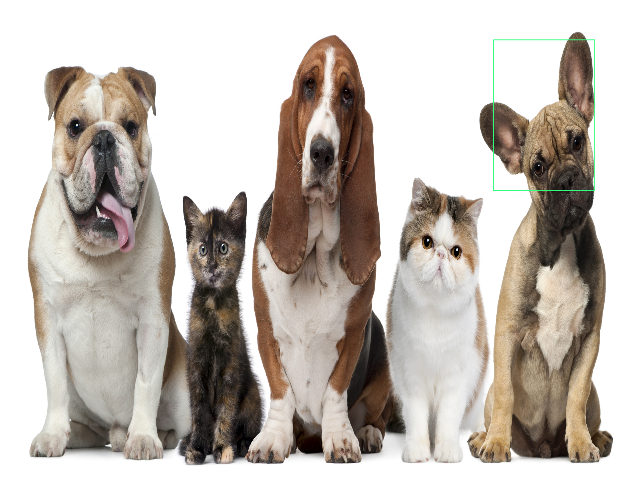

In [62]:
from IPython.display import Image
Image("out.png", width=640, height=480)

In [43]:
!grep -4 32 object_detection/data/pet_label_map.pbtxt



  name: 'scottish_terrier'
}

item {
  id: 32
  name: 'shiba_inu'
}

item {
